In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import logit
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('./Documents/Concatenated_Data_For_Study.csv')

In [36]:
formula = ('is_increased ~ at_least_one_cr_smell')
model = logit(formula = formula, data = df).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.340473
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           is_increased   No. Observations:                10814
Model:                          Logit   Df Residuals:                    10812
Method:                           MLE   Df Model:                            1
Date:                Thu, 24 Nov 2022   Pseudo R-squ.:                0.007687
Time:                        22:03:39   Log-Likelihood:                -3681.9
converged:                       True   LL-Null:                       -3710.4
Covariance Type:            nonrobust   LLR p-value:                 4.261e-14
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -2.5705      0.074    -34.507      0.000      -2.716      -2.

In [37]:
# Odds ratio
print(np.exp(model.params))

Intercept                0.076498
at_least_one_cr_smell    1.799124
dtype: float64


In [38]:
# Marginal effects computation
AME = model.get_margeff(at = 'overall', method = 'dydx')
print(AME.summary())

        Logit Marginal Effects       
Dep. Variable:           is_increased
Method:                          dydx
At:                           overall
                           dy/dx    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
at_least_one_cr_smell     0.0565      0.008      7.122      0.000       0.041       0.072


<AxesSubplot: xlabel='at_least_one_cr_smell', ylabel='is_increased'>

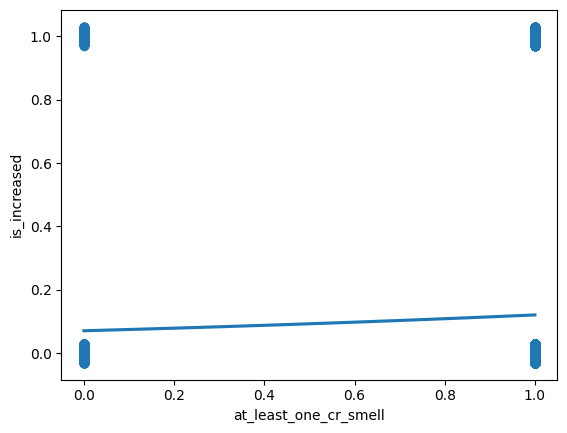

In [33]:
sns.regplot(x = "at_least_one_cr_smell", y = "is_increased", y_jitter = 0.03, data = df, logistic = True, ci = None)

In [45]:
# Weighted model

feature_cols = ['at_least_one_cr_smell']
X = df[feature_cols]
y = df.is_increased

logreg = LogisticRegression(class_weight = 'balanced')

# fit the model with data
clf = logreg.fit(X, y)

print(clf.coef_, clf.intercept_)

[[0.58595655]] [-0.4620017]
